$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Assignment 1: Linear Regression

*Yinzhi Deng*

*CSU ID: 830888654*

## Overview

The purpose of this assignment is to use Python to apply linear regression. The way to accomplish it is to find a linear model, normally is a line, from the given samples of inputs and known desired outputs. Using all of the known data to calculate the matrix of w and c, that are the slope and the intercept of the line, so that the sum of squared errors are the smallest among all of other lines. This is called linear regression.

## Method

The purpose of function "model = train(X, T)" is to calculate w by the inputs X and the actual outputs T after standadizing the inputs using their own mean values and standard deviations. This function will return a dictionary named model containing the mean values, standard deviation, and w.

The purpose of function "predict = use(model, X)" is to use the w from model and standardized X to calculate the predicted target values.

The purpose of function "error = rmse(predict, T)" is to calculate the root-mean-square error using the actual target values and the predicted target values, and this is used to evaluate the quality of your linear model.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In the functions of train() and use(), before calculating the w, it is necessary to standadize the inputs. The standadization means let the difference values between data and their mean values to divide their standard deviations, and the outputs are the standadized data.

In [5]:
def train(X,T):
    means = np.mean(X,axis=0)
    stds = np.std(X,axis=0)
    X = np.divide((X-means),stds)
    X = np.hstack((np.ones((X.shape[0],1)),X))
    w = np.linalg.lstsq(np.dot(X.T,X),np.dot(X.T,T))
    w = w[0]
    return {'means':means,'stds':stds,'w':w}

In [6]:
def use(model,X):
    means = model['means']
    stds = model['stds']
    X = np.divide((X-means),stds)
    X = np.hstack((np.ones((X.shape[0],1)),X))
    w = model['w']
    predict = np.dot(X, w)
    return predict

In [7]:
def rmse(predict,T):
    error = np.sqrt(np.mean((predict - T) ** 2))
    return error

## Data

The data I use is called Boston Housing Data. It was found from http://archive.ics.uci.edu/ml/datasets/Housing and this dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. And here are the meanings of each attribute below:

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [8]:
data = np.loadtxt('housing.data')

In [9]:
data.shape

(506, 14)

In [10]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

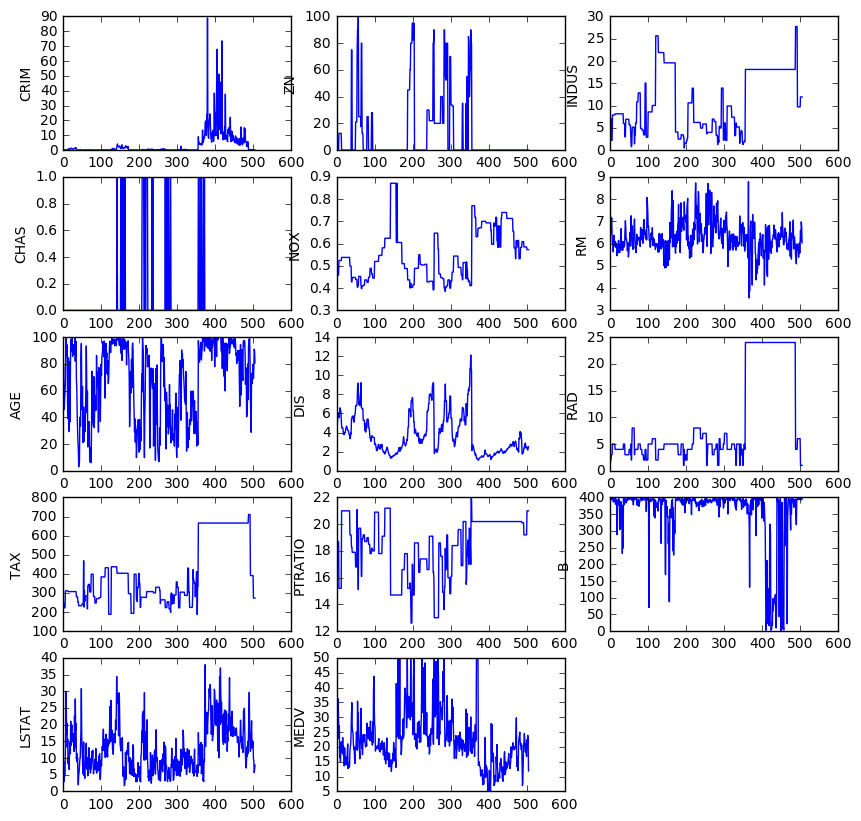

In [12]:
plt.figure(figsize=(10,10))
nrow,ncol = data.shape
for c in range(ncol):
    plt.subplot(5,3, c+1)
    plt.plot(data[:,c])
    plt.ylabel(names[c])

From the plots listed above, I notice that the MEDV, the 'Median value of owner-occupied homes in $1000's' maybe the target data I want to predict by building a linear regression model from other data, because as we know, the price of a house depends on all of the attributes of this house. Thus, I want to try to predict MEDV from the other attributes. I found that the column of MEDV is the last one, so it is time to select it and make it as a one column matrix.

In [13]:
T = data[:,13:]

In [15]:
X = data[:,0:13]

In [16]:
Xnames = names[0:13]
Tname = names[13]
Xnames,Tname

(['CRIM',
  'ZN',
  'INDUS',
  'CHAS',
  'NOX',
  'RM',
  'AGE',
  'DIS',
  'RAD',
  'TAX',
  'PTRATIO',
  'B',
  'LSTAT'],
 'MEDV')

So, I want to see if a linear model makes some sense by plotting the target values versus each of the input variables.

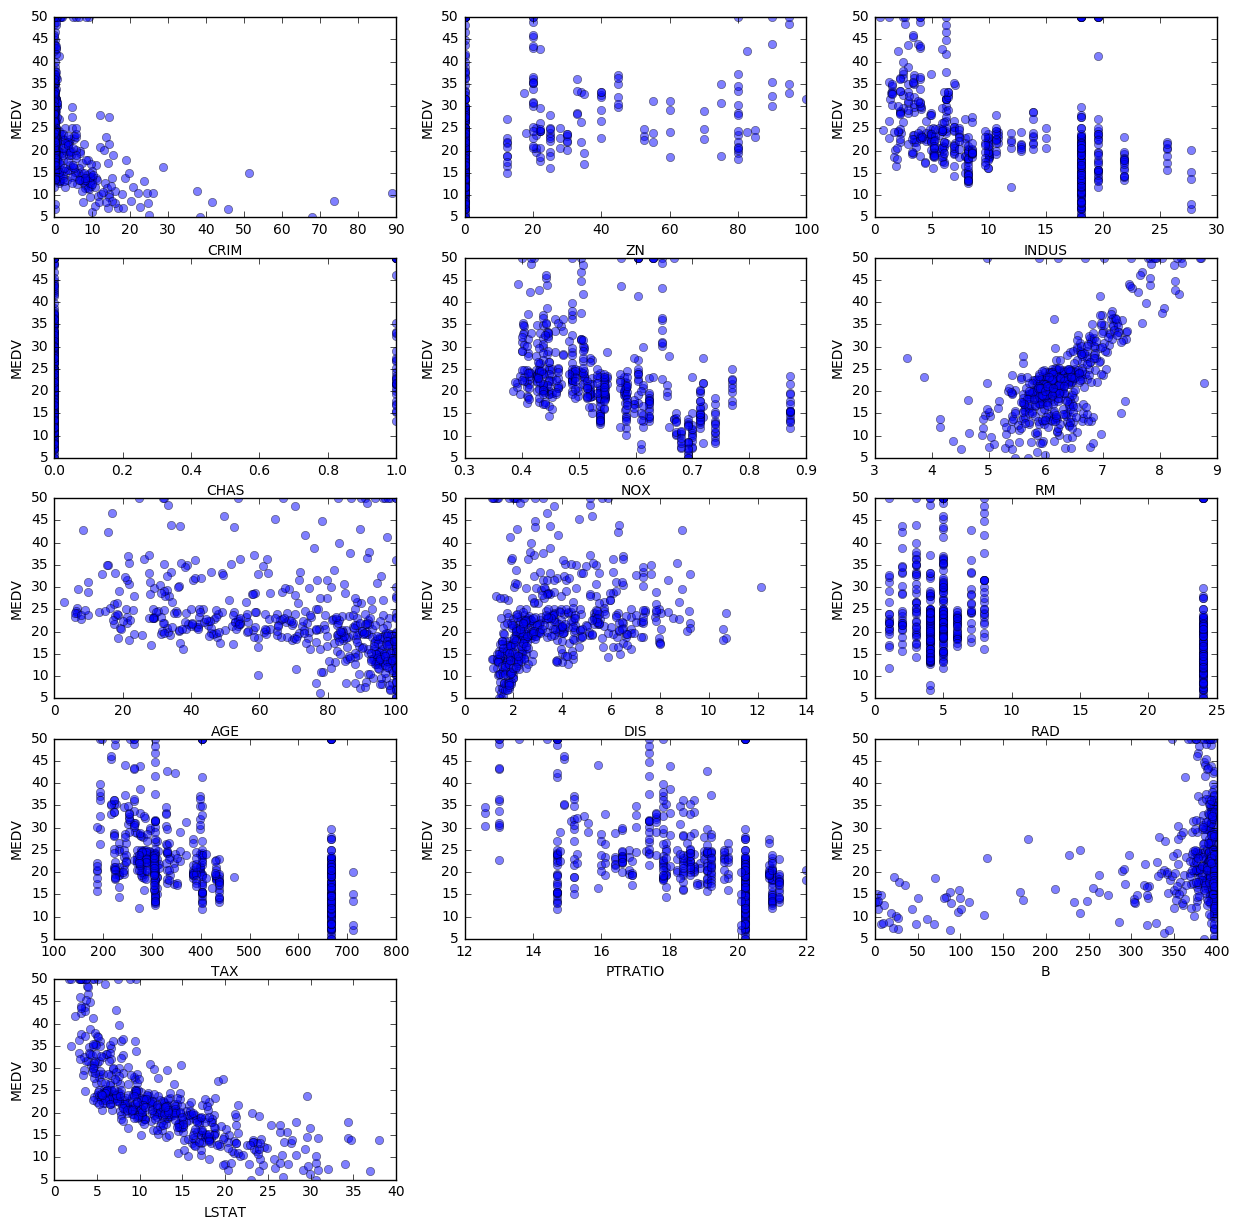

In [17]:
plt.figure(figsize=(15,15))
for c in range(X.shape[1]):
    plt.subplot(5,3, c+1)
    plt.plot(X[:,c], T, 'o', alpha=0.5)
    plt.ylabel(Tname)
    plt.xlabel(Xnames[c])

From the plots above, I noticed that some of the inputs are obviouosly relative to the target value, such as RM, AGE, and LSTAT. However,the CHAS, RAD, and TAX look having no relationship with the MEDV.

## Results

Apply your functions to the data and plot the results.  

Show the values of the resulting weights and discuss which ones might be least relevant for fitting your linear model.  Remove them, fit the linear model again, plot the results, and discuss what you see.

In [23]:
model = train(X, T)
predict = use(model, X)
error = rmse(predict, T)
error

4.6791912956972821

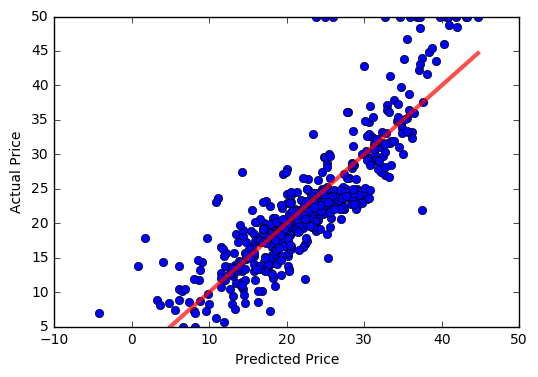

In [24]:
plt.plot(predict,T,'o')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
# add a 45 degree line
a = max(min(predict),min(T))
b = min(max(predict),max(T))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.7);

In [25]:
w = model['w']
Xnames.insert(13, 'bias')
for wi,name in zip(w.flat,Xnames):
    print('{:8.3f}  {:s}'.format(wi,name))

  22.533  CRIM
  -0.928  ZN
   1.082  INDUS
   0.141  CHAS
   0.682  NOX
  -2.057  RM
   2.674  AGE
   0.019  DIS
  -3.104  RAD
   2.662  TAX
  -2.077  PTRATIO
  -2.061  B
   0.849  LSTAT
  -3.744  bias


From the list, the weight of DIS and CHAS is the smallest, so we can remove them and see what will happen.

In [30]:
X1 = np.delete(X,3,1)
X2 = np.delete(X,7,1)
model = train(X2, T)
predict = use(model, X2)
error = rmse(predict, T)
error

4.932588467850775

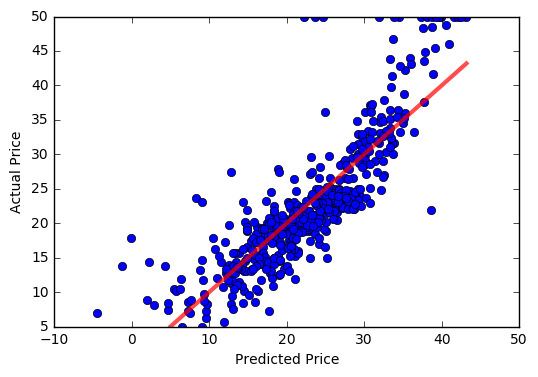

In [31]:
plt.plot(predict,T,'o')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
# add a 45 degree line
a = max(min(predict),min(T))
b = min(max(predict),max(T))
plt.plot([a,b],[a,b], 'r', linewidth=3,alpha=0.7);

After removing the DIS and CHAS attributes, whose weights are the smallest, I found the error is increased instead of becoming smaller, while the plot is still the same as before. For this result, I think it may happen because the deleted attributes are effective to the prediction. Even if their weights are the least, it still increase the error. To the contrast, if we find the error become decreased after we delete some attributes, that is because they are noises for the target values. When we delete the noises, prediction becomes more accurate.

## Grading

Your notebook will be run and graded automatically.  Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs480/notebooks/A1grader.tar) and extract `A1grader.py` from it. After running all of the above cells in your notebook, run the code in the following cell to demonstrate an example grading session.  You should see a perfect score of 100/100 if your functions are defined correctly.

In [32]:
%run -i "A1grader.py"

20/20 points. 'means' values are correct.
20/20 points. 'stds' values are correct.
20/20 points. 'w' values are correct.
20/20 points. Values returned by 'use' are correct.
20/20 points. rmse() is correct.
Downloads Grade is 100/100
